<a href="https://colab.research.google.com/github/atharvabiyani/Sentiment-Analysis-For-Movie-Reviews/blob/main/XG_Boost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


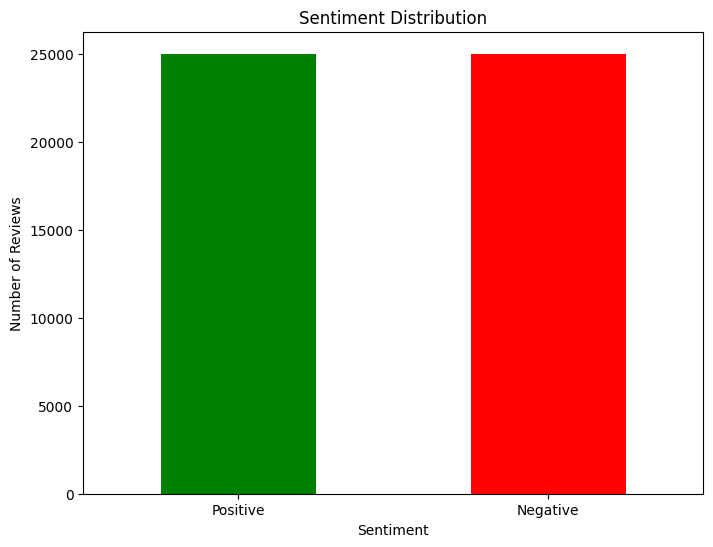

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(ticks=[0, 1], labels=['Positive', 'Negative'], rotation=0)
plt.show()

In [ ]:
import re

# Assuming 'review' is the column name containing the text data
df['review'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x))  # remove HTML tags
df['review'] = df['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))  # removing non-alphabet characters
df['review'] = df['review'].str.lower()  # text to lowercase
df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True)  # remove extra spacesW

df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


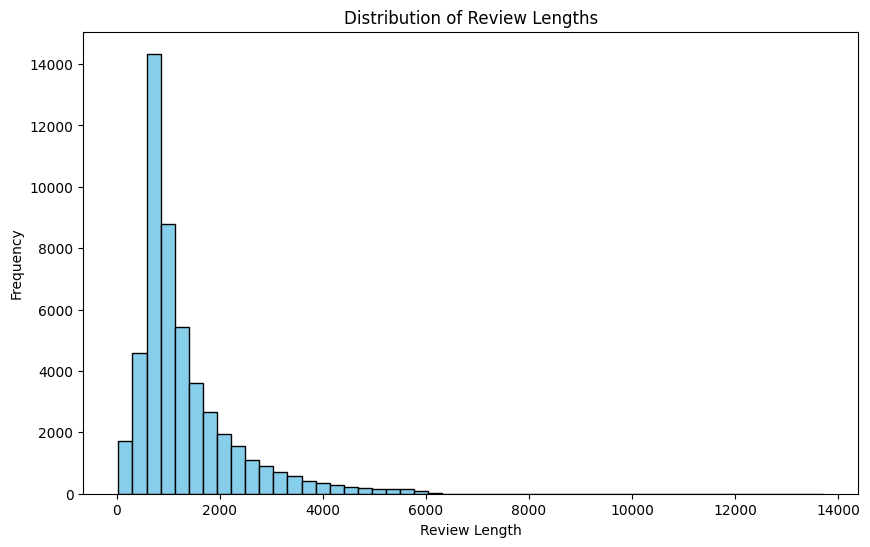

In [ ]:
from tqdm.auto import tqdm

# Load the dataset
file_path = '/IMDB Dataset.csv'
df = pd.read_csv(file_path)

# Show the head of the dataframe
df_head = df.head()
print(df_head)

# Describe the dataframe
df_description = df.describe(include='all', datetime_is_numeric=True)
print(df_description)

# Plotting the distribution of review lengths
import matplotlib.pyplot as plt

# Calculate the length of each review
review_lengths = df['review'].str.len()

plt.figure(figsize=(10,6))
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate the number of rows for each split
total_rows = len(df)
train_size = int(0.7 * total_rows)
test_size = int(0.2 * total_rows)
validate_size = int(0.1 * total_rows)

# Split the dataset into train, test, and validate sets
train = df.iloc[:train_size]
test = df.iloc[train_size:train_size + test_size]
validate = df.iloc[train_size + test_size:]

# Check the lengths of the splits
print("Train set length:", len(train))
print("Test set length:", len(test))
print("Validate set length:", len(validate))

Train set length: 35000
Test set length: 10000
Validate set length: 5000


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Pre Processing
stop_words = stopwords.words('english') # creates a list of English stop words
wnl = WordNetLemmatizer() # I used lemmatizing instead of stemming

def preprocess(text_column):
    """
    Function:    This function aims to remove links, special
                 characters, symbols, stop words and thereafter
                 lemmatise each word in the sentence to transform
                 the dataset into something more usable for a
                 machine learning model.
    Input:       A text column
    Returns:     A text column (but transformed)
    """
    new_review = []
    for review in text_column:
    # for every sentence, we perform the necessary pre-processing
      text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+",
                 ' ',
                 str(review).lower()).strip()
      text = [wnl.lemmatize(i) for i in text.split(' ') if i not in stop_words]
      new_review.append(' '.join(text)) # form back into a sentence

    return new_review

train['review'] = preprocess(train['review'])
test['review'] = preprocess(test['review'])





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-34-8a56196eb0f8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['review'] = preprocess(train['review'])
<ipython-input-34-8a56196eb0f8>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['review'] = preprocess(test['review'])


In [ ]:
train.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


In [ ]:
test.head()

,review,sentiment
35000,dont bother thought would see movie great sups...,negative
35001,careful one get yer mitt itll change way look ...,positive
35002,chili palmer tired movie know want success mus...,negative
35003,following littleknown british film made budget...,positive
35004,dark angel cross huxley brave new world percy ...,positive


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizing the sentences
cv = CountVectorizer(binary = True) # implies that it indicates whether the word is present or not.
cv.fit(train['review']) # find all the unique words from the training set
train_x = cv.transform(train['review'])
test_x = cv.transform(test['review'])

test_x

<10000x161393 sparse matrix of type '<class 'numpy.int64'>'
	with 937915 stored elements in Compressed Sparse Row format>

In [ ]:
# importing the relevant modules
import xgboost as xgb
xgb_train_labels = []
for sentiment in train['sentiment']:
    if sentiment == 'positive':
        xgb_train_labels.append(1)
    elif sentiment == 'negative':
        xgb_train_labels.append(0)
    else:
        xgb_train_labels.append(None)

xgb_test_labels = []
for sentiment in test['sentiment']:
    if sentiment == 'positive':
        xgb_test_labels.append(1)
    elif sentiment == 'negative':
        xgb_test_labels.append(0)
    else:
        print("HELP")
        xgb_test_labels.append(None)
# creating a variable for the new train and test sets
xgb_train = xgb.DMatrix(train_x, xgb_train_labels)
xgb_test = xgb.DMatrix(test_x, xgb_test_labels)

In [ ]:
# Setting the Parameters of the Model
param = {'eta': 0.75,
         'max_depth': 50,
         'objective': 'binary:logitraw'}
# Training the Model
xgb_model = xgb.train(param, xgb_train, num_boost_round = 30)
# Predicting using the Model
y_pred = xgb_model.predict(xgb_test)
y_pred = np.where(np.array(y_pred) > 0.5, 1, 0) # converting them to 1/0’s

In [ ]:
 from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(xgb_test_labels, y_pred)
f1 = f1_score(xgb_test_labels, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.8305
F1 Score: 0.8270937468122004


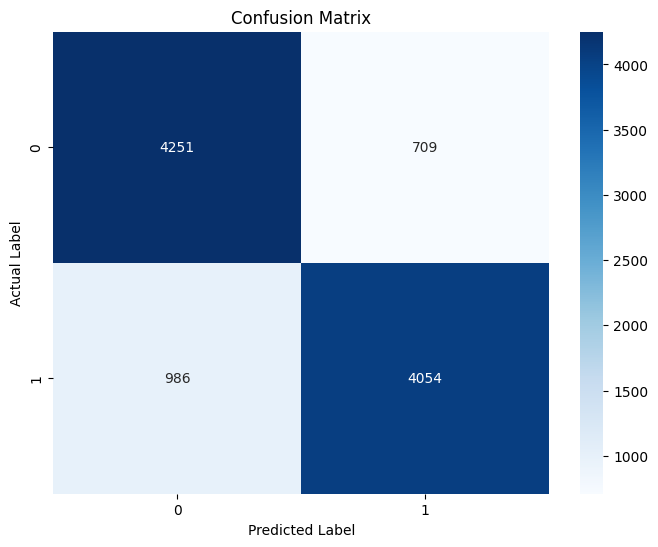

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(xgb_test_labels, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

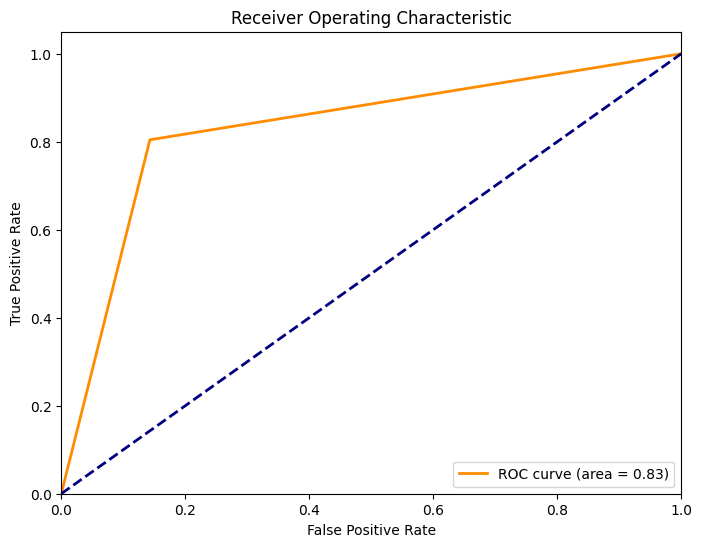

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(xgb_test_labels, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

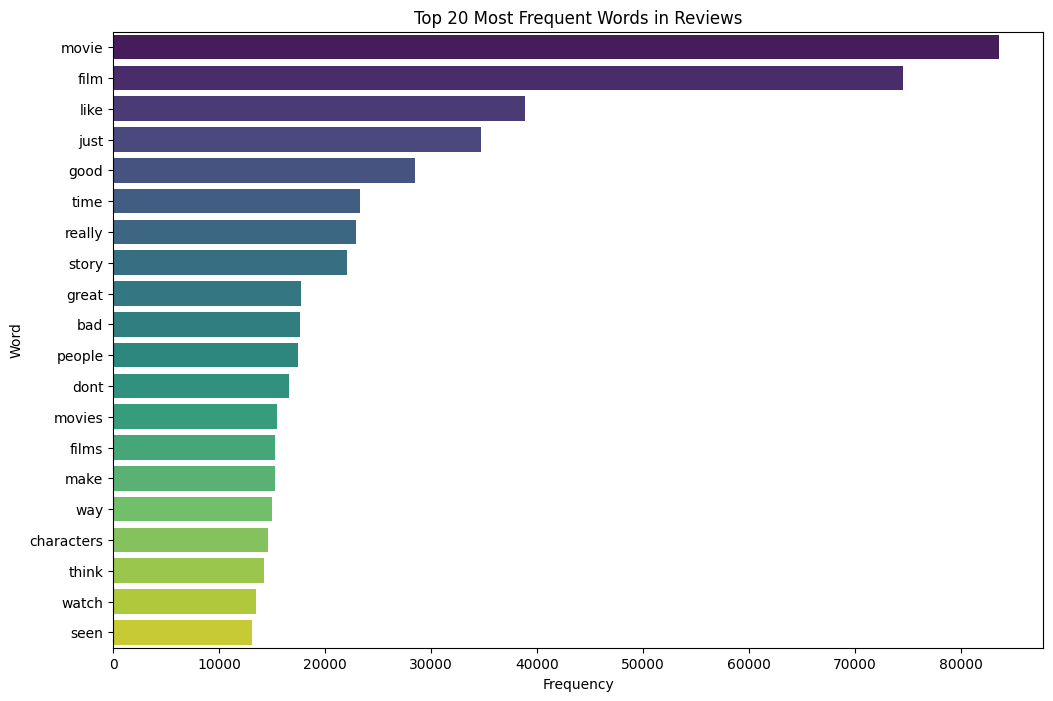

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

all_words = ' '.join(df['review']).lower().split()
filtered_words = [word for word in all_words if word not in ENGLISH_STOP_WORDS]

word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(20)

words_df = pd.DataFrame(most_common_words, columns=['word', 'frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=words_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()